In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [2]:
train_data = pd.read_csv("train.csv")
train_data.tail(10)

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
7726,ID_99925483,Female,39,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87610121,South Africa,...,Single and have never been married/never lived...,SiSwati,SiSwati,Grade 10/Standard 8/Form 3,No,No,No,No,Not applicable,0
7727,ID_99928043,Female,27,Black African,Dwelling/house/flat/room in backyard,Formal,Gauteng,GP - Ekurhuleni,79711671,South Africa,...,Single and have never been married/never lived...,Tshivenda,IsiZulu,Honours Degree,No,No,No,No,Not applicable,0
7728,ID_99942123,Female,55,Black African,Dwelling/house or brick/concrete block structu...,Formal,KwaZulu-Natal,KZN - Non Metro,58210227,South Africa,...,Widowed,IsiZulu,Other (Specify ),Grade 6/Standard 4,No,Yes,No,Not applicable,Casual,0
7729,ID_99947243,Female,27,Coloured,Semi-Detached house,Formal,Western Cape,WC - City of Cape Town,19911411,South Africa,...,Married,Afrikaans,English,Grade 8/Standard 6/Form 1,No,No,No,No,Not applicable,0
7730,ID_99960043,Female,61,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87110364,South Africa,...,Married,Sepedi,Sepedi,Grade 6/Standard 4,No,No,No,No,Not applicable,0
7731,ID_99962603,Female,55,Black African,Informal dwelling/shack in backyard,Informal,Gauteng,GP - Non Metro,76011291,South Africa,...,Living together like husband and wife,Sesotho,Sesotho,Grade 4/Standard 2,No,No,No,No,Not applicable,0
7732,ID_99970283,Female,22,Coloured,Dwelling/house or brick/concrete block structu...,Formal,Western Cape,WC - Non Metro,16910060,South Africa,...,Single and have never been married/never lived...,Afrikaans,Afrikaans,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Seasonal,0
7733,ID_99981803,Female,38,Black African,Dwelling/house or brick/concrete block structu...,Formal,Western Cape,WC - Non Metro,16410103,South Africa,...,Widowed,IsiXhosa,IsiXhosa,Do not know,Yes,No,No,Not applicable,Unspecified,0
7734,ID_99983083,Female,52,Black African,Dwelling/house or brick/concrete block structu...,Informal,Mpumalanga,MP - Non Metro,86810088,Other,...,Widowed,Sesotho,IsiZulu,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
7735,ID_99985643,Female,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,67410185,South Africa,...,Married,Setswana,Setswana,Grade 10/Standard 8/Form 3,No,No,No,No,Not applicable,0


Preprocessing

In [7]:

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data.shape

(891, 12)

In [9]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Exploratory Data Analysis(EDA)**

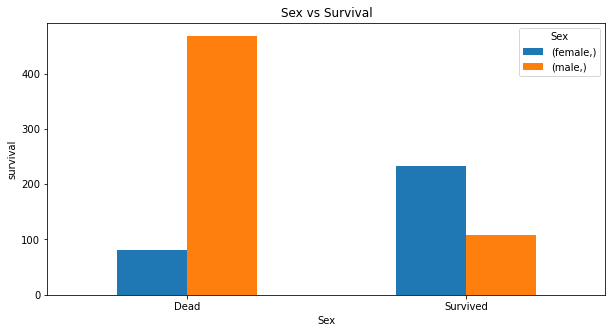

Sex,female,male
Dead,81,468
Survived,233,109


In [11]:
dead = train_data.loc[train_data["Survived"]==0, ["Sex"]].value_counts()
survived = train_data.loc[train_data["Survived"]==1, ["Sex"]].value_counts()
d_s = pd.DataFrame([dead, survived], index=["Dead", "Survived"])
d_s.plot(kind="bar", figsize=(10, 5), title="Sex vs Survival", xlabel="Sex", ylabel="survival", rot=0, fontsize=10)
plt.show()
d_s

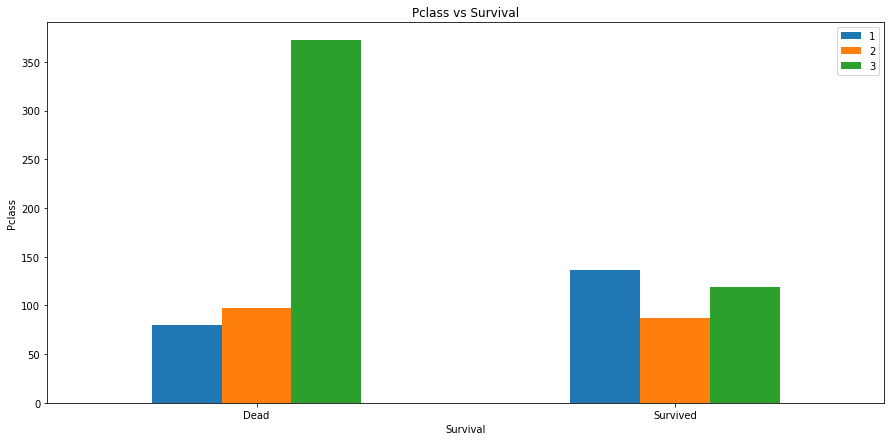

,1,2,3
Dead,80,97,372
Survived,136,87,119


In [12]:
dead = train_data.loc[train_data["Survived"] == 0]["Pclass"].value_counts()
survived = train_data.loc[train_data["Survived"] == 1]["Pclass"].value_counts()
d_s = pd.DataFrame([dead, survived], index=["Dead", "Survived"])
d_s.plot(kind="bar", figsize=(15,7), title="Pclass vs Survival", xlabel="Survival", ylabel="Pclass", rot=0)
plt.show()
d_s

# ****Feature Engineering****

1. I created extracted the titles from the Name feature to create a **Titles** feature
2. I created a new group **Cabgroup** which is the first later of each row in the Cabin feature
3. I created a **Family** feature which is the addition of the Parch and Sibsp columns


# ****Data Cleaning****
1. Filled in the NaN in the Age feature with the mean age of each title
2. Filled in the missing values in the CabGroup with the median Cabgroup grouped by Pclass
3. Filled the two missing values in the Embarked column with **S** which is the most embarked location 

# ****Preprocessing****

In [13]:
def transform_data(df):
    
    titles = {
      "Mr.": 0, "Miss.": 1, "Mrs.": 2, "Master.": 3, "Dr.": 4, "Rev.": 5, "Col.": 4,
      "Mlle.": 4, "Major.": 4, "Jonkheer.": 4, "Ms.": 2, "Capt.": 4, "Countess.": 5, "Sir.": 0, "Don.": 4, "Lady.": 5, "Mme.": 1, "Dona.":2
    }
    df["Title"] = df["Name"].str.extract("([A-Za-z]+\.)", expand = False)
    df["Title"] = df["Title"].map(titles)
    df["Title"].value_counts()
    df[df["Title"] == "Ms."]
    df["Age"].fillna(df.groupby("Title")["Age"].transform("mean"), inplace = True)

    df["Family"] = df["Parch"] + df["SibSp"]

    df["Cabgroup"] = df["Cabin"].str[: 1]
    cabin_mapping = { "C": 1, "B": 2, "D": 3, "E": 4, "A": 5, "F": 6, "G": 7, "T": 8 }
    df["Cabgroup"] = df["Cabgroup"].map(cabin_mapping)
    df["Cabgroup"].fillna(df.groupby("Pclass")["Cabgroup"].transform("median"), inplace = True)

    df["Embarked"].fillna("S", inplace = True)

        # df["Sex"] = df["Sex"].astype("category")
        # df["SexEcoded"] = df["Sex"].cat.codes
        # df.drop(["SexEcoded"], axis = 1, inplace = True)

    df.loc[df["Age"] <= 12, "Age"] = 0
    df.loc[(df["Age"] > 12) & (df["Age"] <= 19), "Age"] = 1
    df.loc[(df["Age"] > 19) & (df["Age"] <= 25), "Age"] = 2
    df.loc[(df["Age"] > 25) & (df["Age"] <= 35), "Age"] = 3
    df.loc[(df["Age"] > 35) & (df["Age"] <= 50), "Age"] = 4
    df.loc[df["Age"] > 50, "Age"] = 5

    df.loc[df["Fare"] <= 5, "Fare"] = 0
    df.loc[(df["Fare"] > 5) & (df["Fare"] <= 15), "Fare"] = 1
    df.loc[(df["Fare"] > 15) & (df["Fare"] <= 25), "Fare"] = 2
    df.loc[(df["Fare"] > 25) & (df["Fare"] <= 40), "Fare"] = 3
    df.loc[(df["Fare"] > 40) & (df["Fare"] <= 70), "Fare"] = 4
    df.loc[df["Fare"] > 70, "Fare"] = 5

    le.fit(df["Sex"])
    df["Sex"] = le.transform(df["Sex"])

    le.fit(df["Embarked"])
    df["Embarked"] = le.transform(df["Embarked"])

    le.fit(df["Ticket"])
    df["Ticket"] = le.transform(df["Ticket"])

    df.drop(["Name", "Cabin", "SibSp", "Parch"], axis = 1, inplace = True)
    df.head(50)
    
    return df


In [14]:
train = transform_data(train_data)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
Title          0
Family         0
Cabgroup       0
dtype: int64

In [15]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Cabgroup
0,1,0,3,1,2.0,523,1.0,2,0,1,6.0
1,2,1,1,0,4.0,596,5.0,0,2,1,1.0
2,3,1,3,0,3.0,669,1.0,2,1,0,6.0
3,4,1,1,0,3.0,49,4.0,2,2,1,1.0
4,5,0,3,1,3.0,472,1.0,2,0,0,6.0


In [16]:
# Initialize models

lr = LogisticRegression(random_state=1)
randF= RandomForestClassifier(n_estimators=100, max_depth=10,min_samples_split=5, min_samples_leaf= 5,random_state=0)
dTree = DecisionTreeClassifier(max_depth=10, min_samples_split=5,min_samples_leaf= 5, random_state=0)

voting_hard = VotingClassifier(estimators=[('Logreg', lr),
                                          ('Random', randF),
                                          ('Decision', dTree)])

voting_soft = VotingClassifier(estimators=[('Logreg', lr),
                                          ('Random', randF),
                                          ('Decision', dTree)],
                              voting='soft')

In [17]:
# create features and target varible from the train_data to cross_validate with the models

y_train = train_data["Survived"]
x_train = train_data.drop(["Survived"], axis=1)

Cross validating my model on the training data.

In [18]:
for m in (lr, randF, dTree, voting_hard, voting_soft):
    
    print(m.__class__.__name__, cross_val_score(m, x_train, y_train, cv=3).mean())

LogisticRegression 0.7957351290684623
RandomForestClassifier 0.8226711560044894
DecisionTreeClassifier 0.7789001122334457
VotingClassifier 0.819304152637486
VotingClassifier 0.8271604938271605


# ****Observation****
The RandomForestClassifer has the highest validation score followed by the VotingClassifers

# **Testing the on the test data**

In [19]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
test.shape

(418, 11)

In [21]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
test["Fare"].fillna(test["Fare"].mean(), inplace = True)

In [23]:
test = transform_data(test)
test.head()


,PassengerId,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Cabgroup
0,892,3,1,3.0,152,1.0,1,0,0,6.0
1,893,3,0,4.0,221,1.0,2,2,1,6.0
2,894,2,1,5.0,73,1.0,1,0,0,6.0
3,895,3,1,3.0,147,1.0,2,0,0,6.0
4,896,3,0,2.0,138,1.0,2,2,2,6.0


In [24]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
Title          0
Family         0
Cabgroup       0
dtype: int64

In [3]:
y_test = pd.read_csv("gender_submission.csv")
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [26]:
for m in (lr, randF, dTree, voting_hard, voting_soft):
    m.fit(x_train, y_train)
    y_pred = m.predict(test)
#     print(y_pred)
    
    print(m.__class__.__name__, accuracy_score(y_test['Survived'], y_pred))

LogisticRegression 0.8851674641148325
RandomForestClassifier 0.9090909090909091
DecisionTreeClassifier 0.868421052631579
VotingClassifier 0.9234449760765551
VotingClassifier 0.9234449760765551


In [27]:
for m in (lr, randF, dTree, voting_hard, voting_soft):
    
    print(m.__class__.__name__, cross_val_score(m, test, y_pred, cv=3).mean())

LogisticRegression 0.9521240150736553
RandomForestClassifier 0.9497259335388831
DecisionTreeClassifier 0.9593525179856114
VotingClassifier 0.9593182596779718
VotingClassifier 0.9617334703665638


In [28]:
for m in (lr, randF, dTree, voting_hard, voting_soft):
    m.fit(x_train, y_train)
    y_pred = m.predict(test)
    
    print(m.__class__.__name__, confusion_matrix(y_test['Survived'], y_pred))

LogisticRegression [[232  34]
 [ 14 138]]
RandomForestClassifier [[244  22]
 [ 16 136]]
DecisionTreeClassifier [[232  34]
 [ 21 131]]
VotingClassifier [[246  20]
 [ 12 140]]
VotingClassifier [[242  24]
 [  8 144]]


In [29]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('titanic_notebook_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
